In [ ]:
from tilepy.include.ObservationScheduler import GetSchedule
from tilepy.include.PointingTools import NextWindowTools
from tilepy.include.CampaignDefinition import ObservationParameters
import time
import argparse
import os
import datetime

/Users/md274436/software/miniforge3/envs/tilepy/lib/python3.11/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
/Users/md274436/software/miniforge3/envs/tilepy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'
# skymap = 'https://gracedb.ligo.org/api/superevents/S240624cd/files/cwb.multiorder.fits,1'
skymap = (
    "https://gracedb.ligo.org/api/superevents/S240904bv/files/cwb.multiorder.fits,0"
)

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
obsTime = datetime.datetime.fromisoformat("2023-06-10T14:51:47")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = "../../tilepy/dataset/"

# Path to the output folder
outDir = "./output"

# Config file for the tiling scheduling
# NOTE: to have a scheduler for the CWB case, you need to have a config with low cuts on the probability per pointing
cfgFile = "../config/FollowupParameters_CTAON.ini"


# Tiles already observed
pointingsFile = None
# pointingsFile = './output/S240904bv/PGinFoV/SuggestedPointings_2DProbOptimisation.txt'

In [3]:
# Create forder for output
if not os.path.exists(outDir):
    os.makedirs(outDir)

In [4]:
# Parse the parameters
obspar = ObservationParameters()
obspar.add_parsed_args(skymap, obsTime, datasetDir, None, outDir, pointingsFile)
obspar.from_configfile(cfgFile)

In [5]:
# Run the scheduler
from astropy.io import fits
import healpy as hp
import ligo.skymap.io.fits as lf

fitsfile = fits.open(skymap)
fitsfile[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                13158 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'UNIQ    '                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'PROBDENSITY'                                                         
TFORM2  = 'D       '                                                            
TUNIT2  = 'sr-1    '        

The file is already existing, it will be re-downloaded


Starting the 2D pointing calculation with the following parameters

Filename:  S240904bv
Date:  2023-06-10 14:51:47
Previous pointings:  None
Dataset:  ../../tilepy/dataset/
Output:  ./output/S240904bv

============== Main parsed observation parameters ==============  
Observatory Name: CTAO-N
Observatory: 28.75 deg
Observatory: -17.5 deg
Observatory: 2200.0 m
Max zenith: 70
Using Greytime is: False
FOV: 2.0
Max runs: 20
Duration: 15
High Resolution NSIDE: 512
Low Resolution NSIDE: 128
The strategy is (3D, integrated, mangrove=False)
The level of details is (doPlot=True, doRank = True)


-------------------   NEW EVENT   --------------------

----------   NEW FOLLOW-UP ATTEMPT   ----------

Total GW probability covered:  0.0509 Number of runs that fulfill darkness condition  : 16 Number of effective pointings:  16

================================= Tiling found =============================================
     Time[UTC]      RA[deg]  DEC[deg]  PGW   Round ObsName Duration FoV
--------

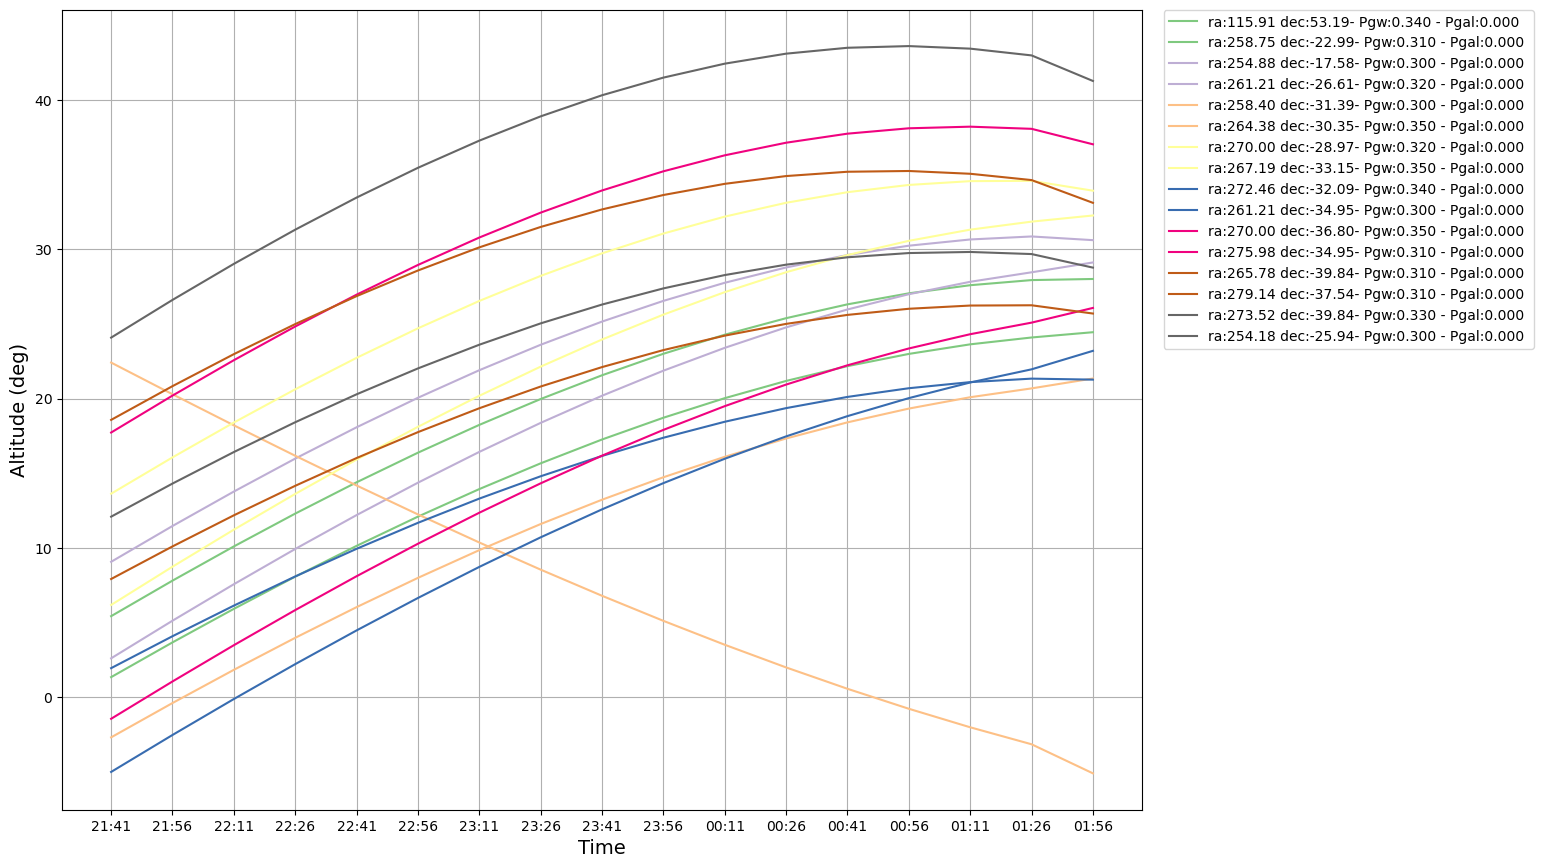

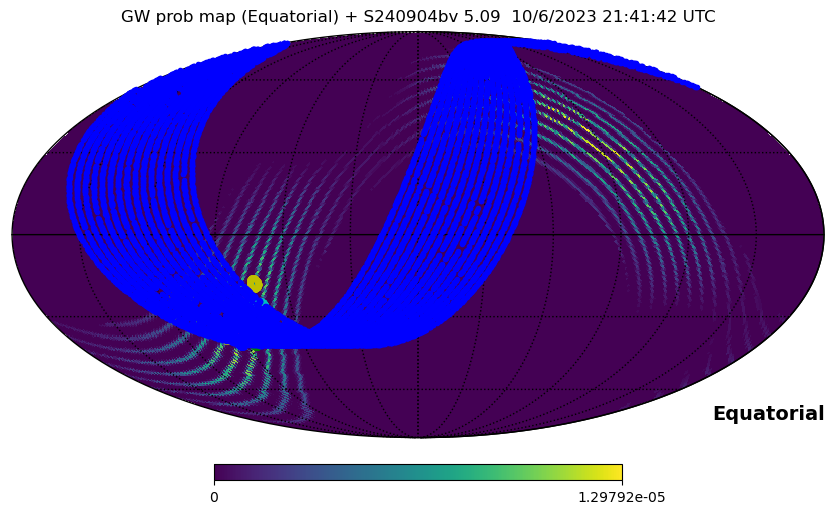

In [6]:
# Run the scheduler
GetSchedule(obspar)